<a href="https://colab.research.google.com/github/Kondojupradeep/OBSIP/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
df=pd.read_csv('/content/Credit Card Customer Data.csv')

In [12]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [14]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [15]:
df.describe()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


<Axes: >

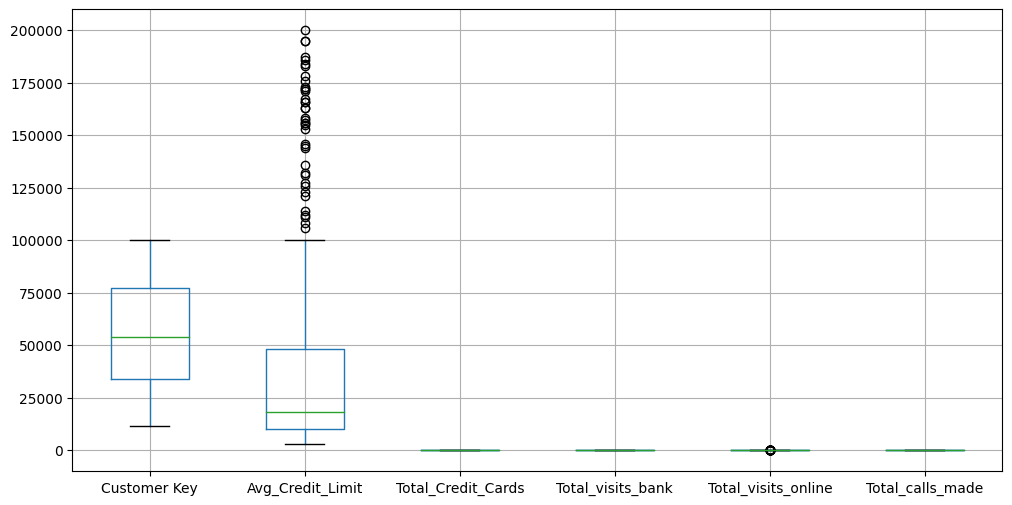

In [16]:
plt.figure(figsize=(12,6))
df.boxplot(column=['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'])

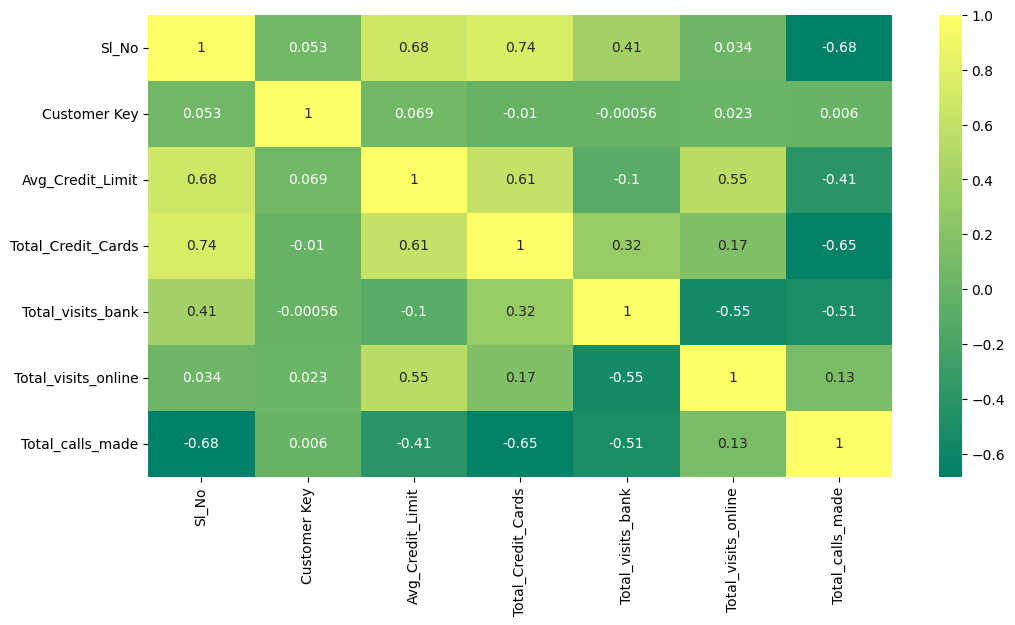

In [17]:
#correlation
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='summer',annot=True)
plt.show()

In [18]:
df.drop('Sl_No',axis=1,inplace=True)

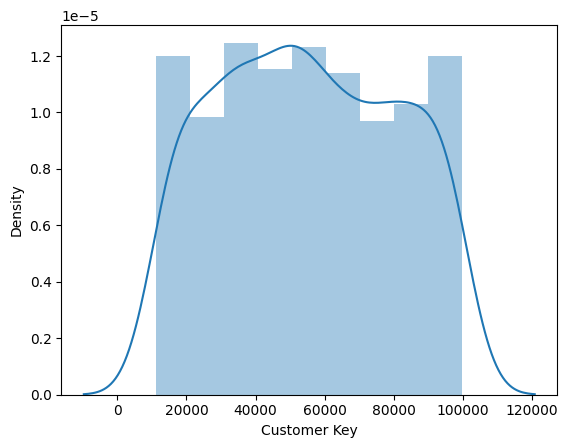

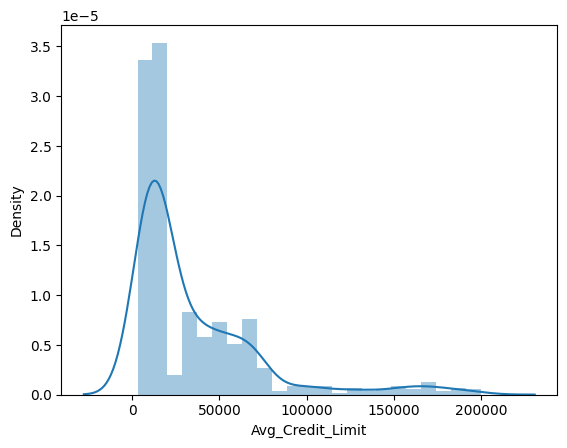

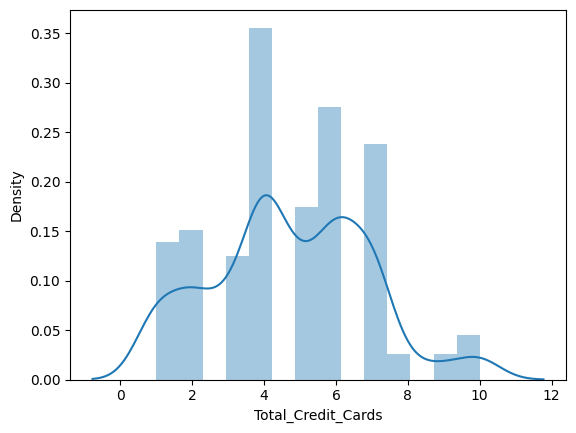

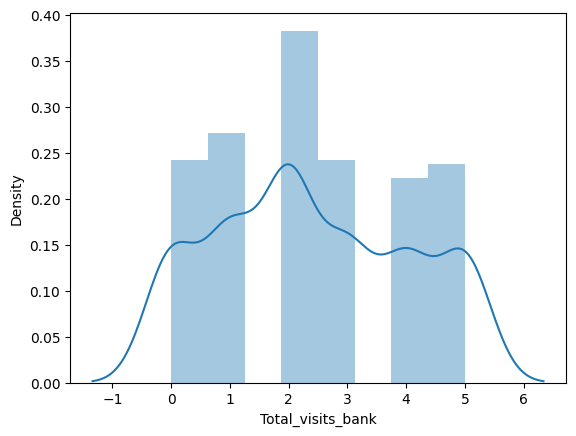

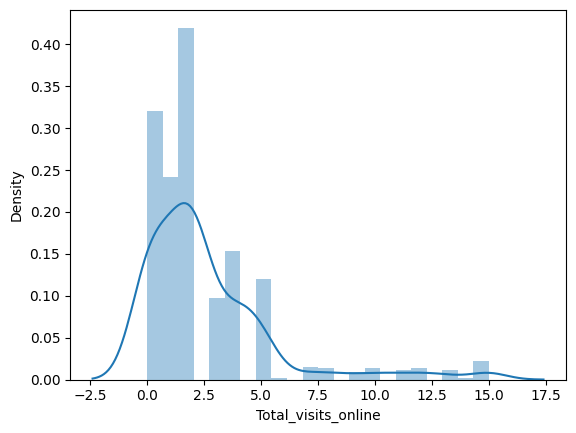

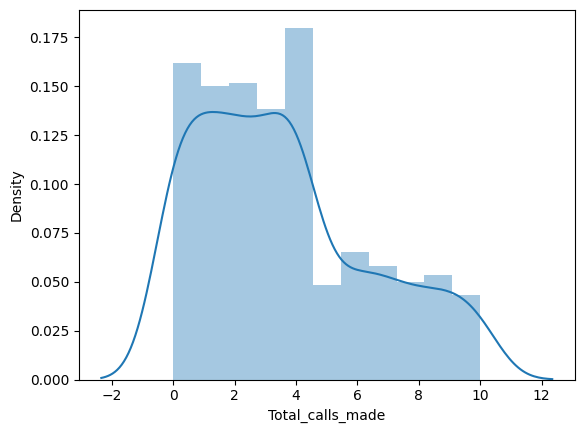

In [19]:
for i in df.columns:
    sns.distplot(df[i],kde=True,hist=True)
    plt.show()

In [20]:
X_numerics=df.drop('Customer Key',axis=1)

In [21]:
#Using Kmeans
from sklearn.cluster import KMeans

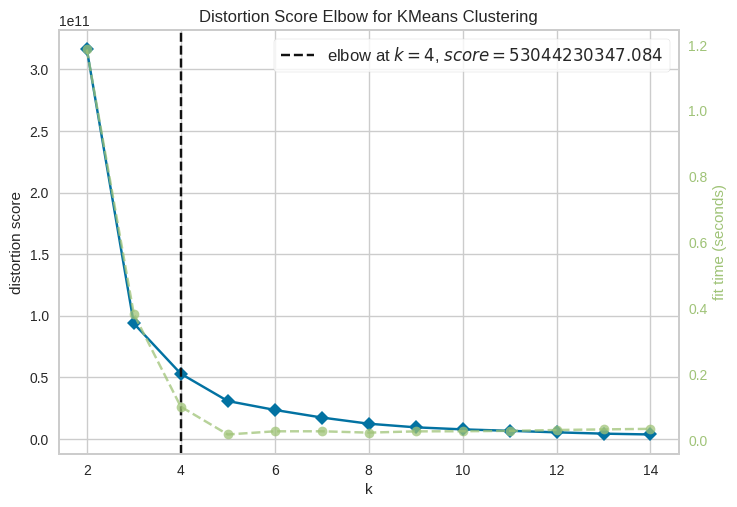

In [22]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans(random_state=1)
visualizer=KElbowVisualizer(model,k=(2,15))
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

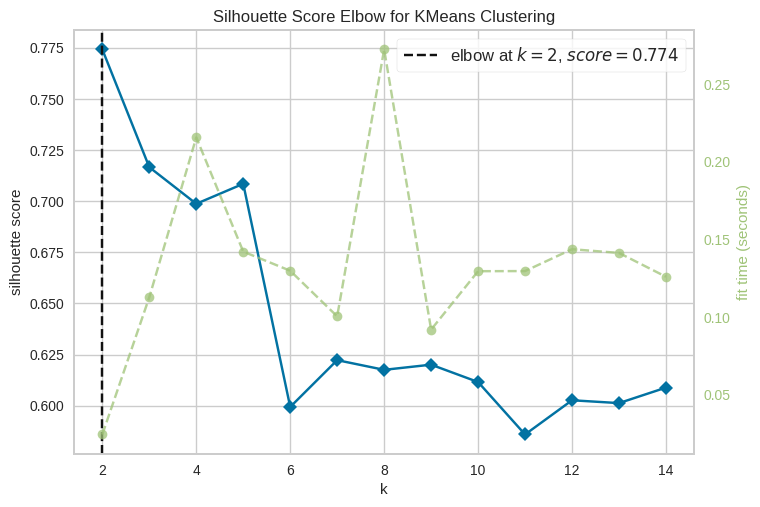

In [23]:
#using silhoutte score
from yellowbrick.cluster import KElbowVisualizer
model=KMeans(random_state=1)
visualizer=KElbowVisualizer(model,k=(2,15),metric='silhouette')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [24]:
#confirming more for chossing value of k
wcss=[]
for i in range(2,15):
    km=KMeans(n_clusters=i)
    km.fit_predict(X_numerics)
    wcss.append(km.inertia_)

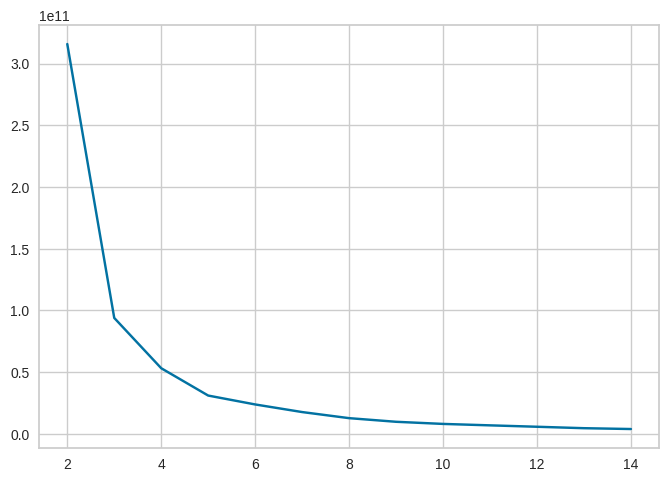

In [25]:
plt.plot(range(2,15),wcss)

In [26]:
#KMeans
KM_4_clusters = KMeans(n_clusters=4, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM4_clustered = X_numerics.copy()
KM4_clustered.loc[:,'Cluster'] = KM_4_clusters.labels_ # append labels to points

In [27]:
KM4_clustered

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,100000,2,1,1,0,1
1,50000,3,0,10,9,3
2,50000,7,1,3,4,3
3,30000,5,1,1,4,3
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,2
658,172000,10,1,15,0,2


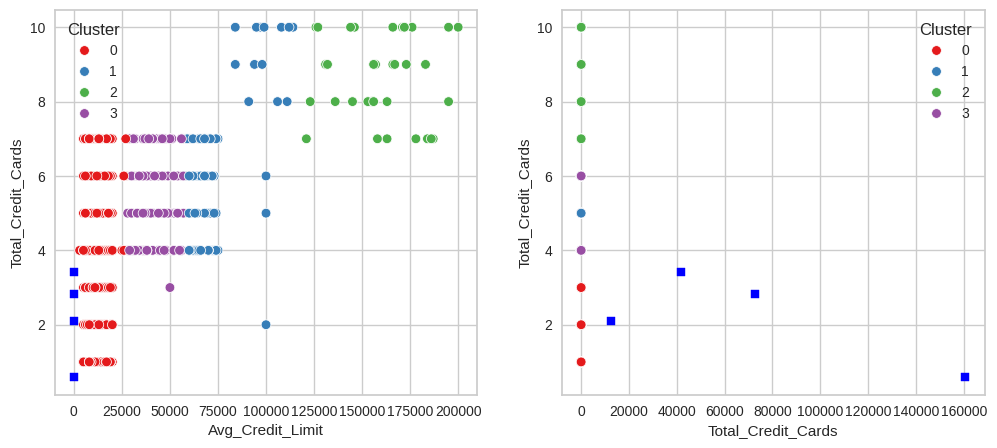

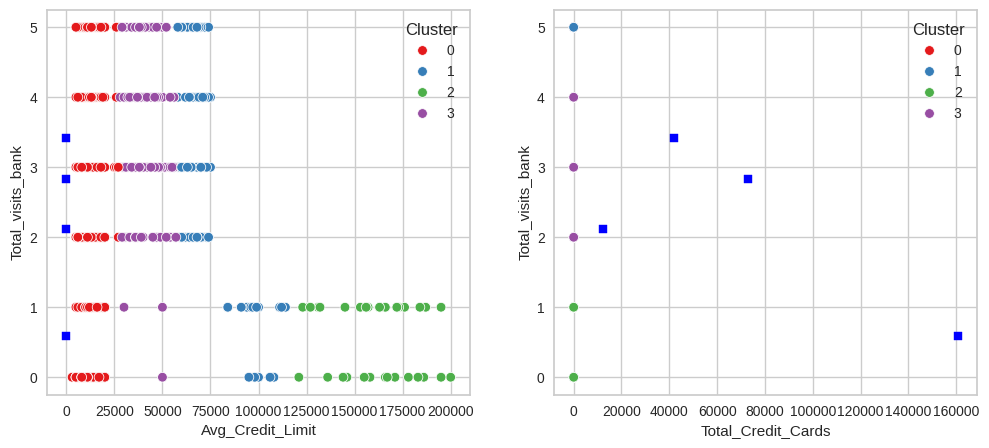

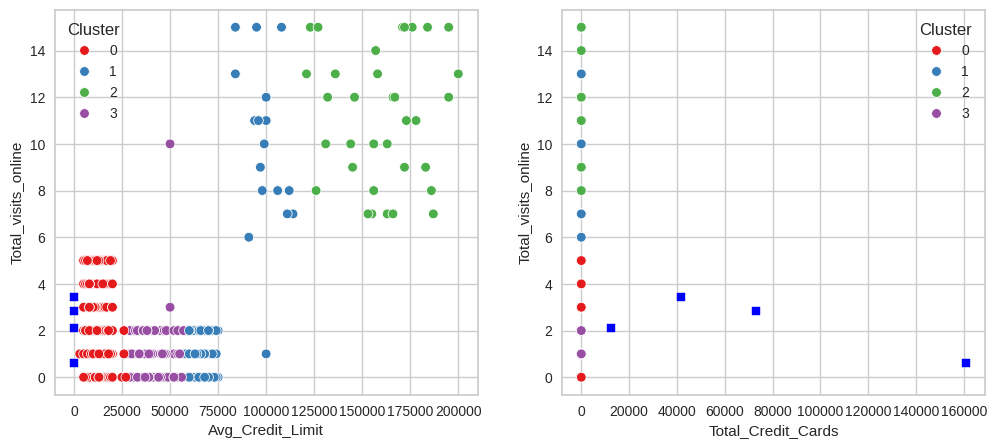

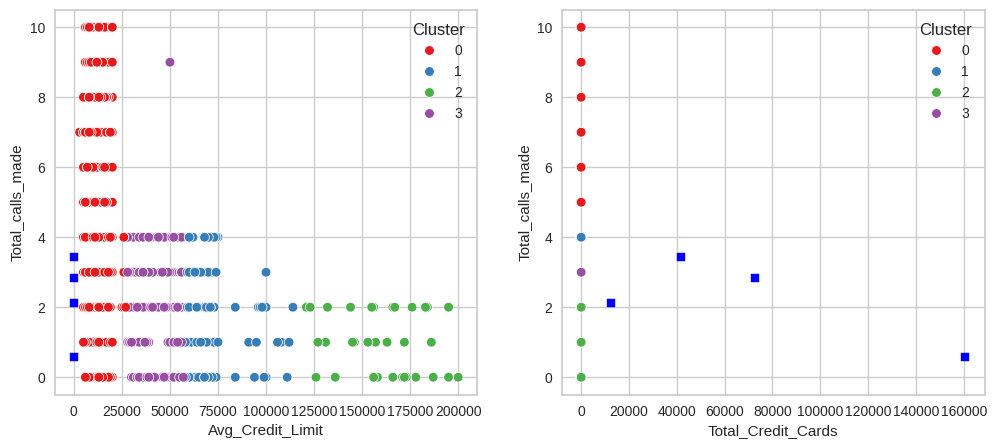

In [28]:
col=['Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
for name in col:
    fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


    scat_1 = sns.scatterplot(x=KM4_clustered['Avg_Credit_Limit'],y= KM4_clustered[name],
                hue=KM4_clustered['Cluster'], ax=axes[0], palette='Set1', legend='full')

    sns.scatterplot(x=KM4_clustered['Total_Credit_Cards'], y=KM4_clustered[name],
                hue=KM4_clustered['Cluster'], palette='Set1', ax=axes[1], legend='full')

    axes[0].scatter(KM_4_clusters.cluster_centers_[:,1],KM_4_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
    axes[1].scatter(KM_4_clusters.cluster_centers_[:,0],KM_4_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
    plt.show()
